# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
print("brain_name:", brain_name)
print("brain: ", brain)

brain_name: BananaBrain
brain:  Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [6]:
# env_info = env.reset(train_mode=True)[brain_name] # reset the environment
# state = env_info.vector_observations[0]            # get the current state
# score = 0                                          # initialize the score
# while True:
#     action = np.random.randint(action_size)        # select an action
#     env_info = env.step(action)[brain_name]        # send the action to the environment
#     next_state = env_info.vector_observations[0]   # get the next state
#     reward = env_info.rewards[0]                   # get the reward
#     done = env_info.local_done[0]                  # see if episode has finished
#     score += reward                                # update the score
#     state = next_state                             # roll over the state to next time step
#     if done:                                       # exit loop if episode finished
#         break
    
# print("Score: {}".format(score))

When finished, you can close the environment.

In [7]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [8]:
# Watch changes and reload automatically
% load_ext autoreload
% autoreload 2

In [9]:
import json

with open("config.json", "r") as f:
    config = json.load(f)
    
import torch

In [10]:
import numpy as np
import torch
from collections import deque
from dqn_agent import Agent
from utils import ensure_dir
import matplotlib.pyplot as plt


agent = Agent(state_size=37, action_size=4, config=config)
brain_name = env.brain_names[0]

def dqn(agent,
        brain_name,
        config,
        n_episodes=config["trainer"]["num_episodes"], 
        max_timesteps_per_ep=config["trainer"]["max_timesteps_per_ep"], 
        eps_start=config["GLIE"]["eps_start"], 
        eps_end=config["GLIE"]["eps_end"], 
        eps_decay=config["GLIE"]["eps_decay"]):
    
    """
    Deep Q-Learning
    """
    flag = False # When environment is technically solved
    # Save path
    save_path = config["trainer"]["save_dir"] + config["exp_name"] + "/" 
    ensure_dir(save_path)    
    scores = [] # list containing scores from each episodes
    scores_window = deque(maxlen=100)
    epsilon = eps_start # init epsilon
    
    for i_episode in range(1, n_episodes + 1):
        # reset the environment
        env_info = env.reset(train_mode=True)[brain_name]
        # get the current state
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_timesteps_per_ep):
#             pdb.set_trace()
            # choose action based on epsilon-greedy policy
            action = agent.act(state, epsilon) 
            # send the action to the environment
            env_info = env.step(action)[brain_name] 
            # get the next state
            next_state = env_info.vector_observations[0]
            # get the reward
            reward = env_info.rewards[0]
            # see if episode has finished 
            done = env_info.local_done[0]
            # step 
            agent.step(state, action, reward, next_state, done)
            # cumulative rewards into score variable
            score += reward
            # get next_state and set it to state
            state = next_state
            
            if done: 
                break
                
        # Update epsilon 
        epsilon = max(eps_decay*epsilon, eps_end)
        
        # save most recent score
        scores.append(score)
        scores_window.append(score)
        
        print('\rEpisode {}\tAverage Score: {:.3f}'.format(i_episode, np.mean(scores_window)), end="")

        if (i_episode % 100 == 0): 
            print("\rEpisode {}\tAverage Score: {:.3f}".format(i_episode, \
                                                               np.mean(scores_window)))
        
        # Save occasionnally
        if (i_episode % config["trainer"]["save_freq"] == 0):

            torch.save(agent.qnetwork_local.state_dict(), save_path + 
                config["trainer"]["save_trained_name"] + "_" + str(i_episode) + ".pth")
        
        # Check if environment solved (if not already)
        if not flag:
            if (np.mean(scores_window) >= 13.0):
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.3f}'.format(
                i_episode-100, np.mean(scores_window)))        
                # Save solved model
                torch.save(agent.qnetwork_local.state_dict(), save_path + 
                        config["trainer"]["save_trained_name"] + "_solved.pth")
                flag = True
#                 break 
    
    return scores

scores = dqn(agent=agent, 
             brain_name=brain_name, 
             config=config)



INFO:Agent:Training on cpu
INFO:ReplayBuffer:Training on cpu


Episode 100	Average Score: 0.640
Episode 200	Average Score: 3.710
Episode 300	Average Score: 8.180
Episode 400	Average Score: 10.920
Episode 492	Average Score: 13.090
Environment solved in 392 episodes!	Average Score: 13.090
Episode 500	Average Score: 12.980
Episode 600	Average Score: 14.190
Episode 700	Average Score: 13.660
Episode 800	Average Score: 14.660
Episode 900	Average Score: 14.880
Episode 1000	Average Score: 15.830


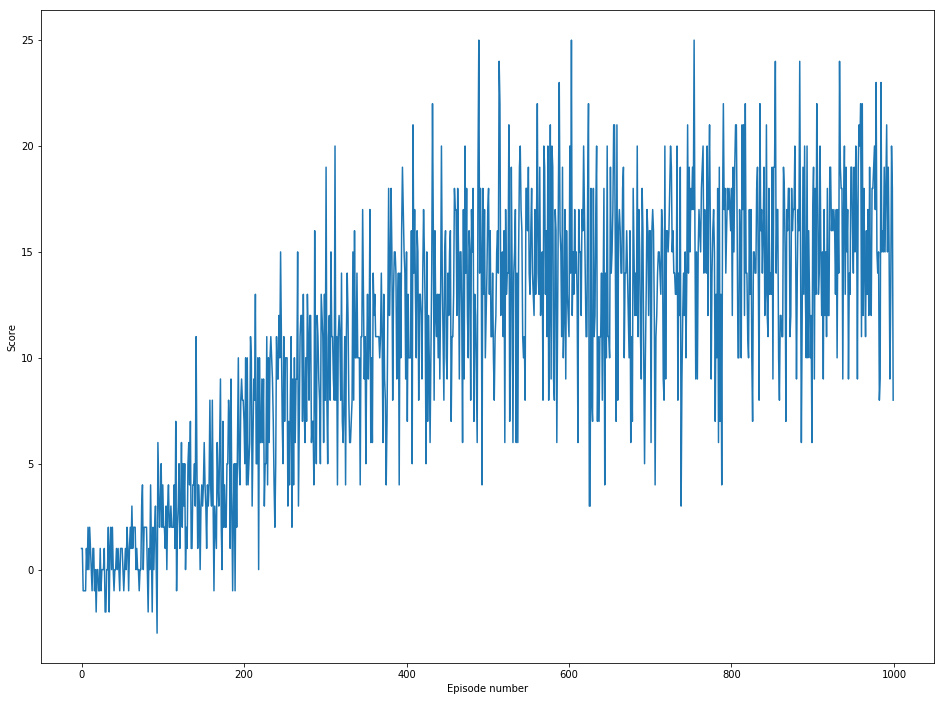

In [11]:
# plot the scores
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.xlabel('Episode number')
plt.ylabel('Score')
plt.show()